<a href="https://colab.research.google.com/github/hoangth30/CIT28-postgressql/blob/main/Week13/Week13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Neural Networks using Sci-kit learn and Keras
This week you will fit a regression model using a neural network model.  You will compare the Sc-kit learn MLPRegressor and Keras neural network.

Run the code cell below to include the libraries.

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation


# Load the Dataset
The code below will allow you to import the dataset from the University of California, Irvine data repository.

In [2]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
df = fetch_ucirepo(id=477)

RealEstate = pd.concat([df.data.features, df.data.targets], axis=1)

# variable information
print(df.variables)


                                     name     role        type demographic  \
0                                      No       ID     Integer        None   
1                     X1 transaction date  Feature  Continuous        None   
2                            X2 house age  Feature  Continuous        None   
3  X3 distance to the nearest MRT station  Feature  Continuous        None   
4         X4 number of convenience stores  Feature     Integer        None   
5                             X5 latitude  Feature  Continuous        None   
6                            X6 longitude  Feature  Continuous        None   
7              Y house price of unit area   Target  Continuous        None   

                                         description  \
0                                               None   
1  for example, 2013.250=2013 March, 2013.500=201...   
2                                               None   
3                                               None   
4  number of conv

In [ ]:
RealEstate.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Input and output features & split into training and testing sets

In [ ]:
train, test = train_test_split(RealEstate, test_size=0.2, random_state=42)


In [ ]:
y = train["Y house price of unit area"]
X = train.drop("Y house price of unit area", axis=1)
y_test = test['Y house price of unit area']
X_test = test.drop('Y house price of unit area', axis=1)

In [ ]:
# Numeric pipeline
num_feature = X.select_dtypes(np.number).columns
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [ ]:
# Categorical pipeline
cat_feature = X.select_dtypes(include=['object']).columns
categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)


In [ ]:
# Preprocessor
preprocessing_pipeline = ColumnTransformer([
    ('numeric', numeric_pipeline, num_feature),
    ('categorical', categorical_pipeline, cat_feature)
])



# Create a Neural Network
It is now time to create the neural network in a pipeline.

```
neural_pip = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('neural', MLPRegressor(., ., .)
])

neural_pip.fix(X_training, y_training)

y_p = neural_pip.predict(X_testing)

print("MSE: ", mean_square_error(y_test, y_p))
print("MAE: ", mean_absolute_error(y_test, y_p))

```

# Question 1
Use the code above to do  the following:
1. Create the pipeline for the Neural Network called nn_pipeline.  Include the preprocess_pipeline call it 'preprocessing'.  Create the MLPRegressor and call it 'nn'.  The parameters for the MLPRegressor are max_iter=300, activation ='relu', hidden_layer_sizes=(100, 100).
2. Fit the nn_pipeline with the training features X and target variable y.
3. Predict the y values using X_test call it y_pred.
4. Print out MSE using mean_squared_error(y_test, y_pred).
5. Print out MAE using mean_absolute_error(y_test, y_pred).

In [ ]:
# Question 1 - 1) (Do not remove)


In [ ]:
# Question 1 - 2 thru 5)  (Do not remove)


# 2. Keras neural network
Keras is not Sci-kit learn library.  It is built on TensorFlow.

```
trans_x = preprocessing_pipeline.fit_transform(X_train)

md = Sequential()
md.add(Dense(., input_dim= X_train.shape[1], activation='.'))
md.add(Dense(., activation='. '))
md.add(Dense(1))

md.compile(loss=., optimizer=keras.optimizers.Adam(learning_rate=., metrics=[' '])

history = md.fit(trans_x, y, epochs=.)
```

# Question 2
Use the code above to do the following:
1. Preprocess the X_train which is X.  Assign the preprocess training X in a variable X_trans.
2. Create a model called model instead of md.  In the first Dense 100, input_dim=X.shape[1], activation='relu'))
3. Create a model called model instead of md with a Dense layer with 100, activation='relu'.
4. Create the last Dense layer of 1.
5. Create model.compile with parameters loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.001), and metrics=['mae'])
6. Display the loss and metric call it history by model.fit(the transformed X training and y with epochs = 300.


In [ ]:
# Question 2  - 1) ( Do not remove)


In [ ]:
# Question 2  - 2 thru 6) ( Do not remove)


# Evaluate the model
Print out the mse and mae to compare to the Sci-kit learn for neural network to the Keras neural network.

```
X_tst_t = preprocessing_pipeline.transform(Xtest)
md.evaluate(X_tst_t, y_test)

```
# Question 3
Using the code above.
1. Transform the X_test dataframe using the preprocessing_pipeline and assign to the X_test_trans.
2. Evaluate the model using the X_test_trans and y_test.  Change md to model.

In [ ]:
# Question 3 - 1 and 2)  (Do not remove)


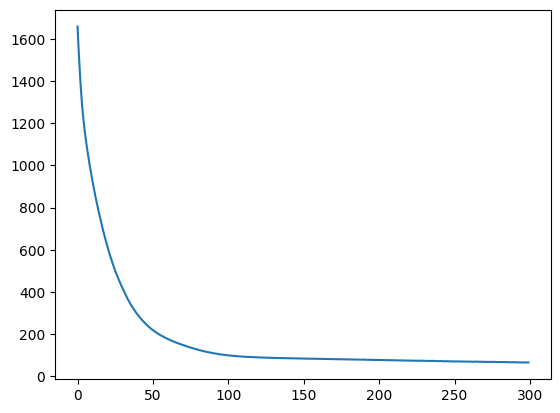

In [ ]:
plt.plot(history.history['loss'])

# Which model is better?
Sci-kit Learn Neural Network or Keras Neural Network.  Answer 'sci-kit' or 'Keras'.

# Question 4
1.  Enter sci-kit or Keras in the variable ans below.

In [ ]:
ans = ' '